## Descriptive Statistics
#### Responses to Andre's Questions

In [1]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
sns.set_style('darkgrid')
%matplotlib notebook

In [2]:
pd.__version__

'0.22.0'

In [3]:
df = pd.read_csv('../../data/napire_truth.csv', encoding='latin1', delimiter=';')

In [4]:
df.head(2)

,lfdn,v_300,v_23,v_3,v_1,v_2,v_4,v_5,v_6,v_7,...,v_279,v_280,v_281,v_282,v_283,v_284,v_285,v_286,v_194,v_297
0,30,English,Japan,7,Agriculture,NotAnswered,Software-intensive embedded systems,NotAnswered,not quoted,quoted,...,NotShown,NotShown,NotShown,NotAnswered,NotAnswered,NotShown,NotShown,NotShown,Nothing,Since systems we developed face the natural en...
1,33,English,Argentina,5,Manufacturing,NotAnswered,Software-intensive embedded systems,NotAnswered,quoted,not quoted,...,NotAnswered,NotAnswered,NotAnswered,NotAnswered,NotAnswered,NotAnswered,NotAnswered,NotAnswered,NotAnswered,NotAnswered


In [5]:
def group_and_count(df, varname, sort=True):
    if not sort:
        return df[['lfdn',varname]].groupby(varname).count()
    else:
        return df[['lfdn',varname]].groupby(varname).count().sort_values('lfdn', ascending=False)

In [6]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

#### 1.1 Participants' Country Affiliations

In [7]:
group_and_count(df, 'v_23') # country, raw

,lfdn
v_23,
Ecuador,78
Brazil,65
Austria,35
Germany,34
Portugal,32
Sweden,26
United States,23
Argentina,22
New Zealand,19


#### 1.2 What is the number of completed questionnaires in total?

In [8]:
len(df)

488

#### 1.3 What does the distribution of project sizes look like?

In [9]:
group_and_count(df, 'v_3') # sizes, raw

,lfdn
v_3,
10,61
5,41
6,37
4,35
20,35
8,28
50,26
15,24
3,19


#### 1.4 In which main industrial sectors is the built software used?

In [10]:
group_and_count(df, 'v_1') # sector, raw

,lfdn
v_1,
Other (please specify),89
Finance,57
Public sector,40
Healthcare,36
e-Commerce,31
Telecommunication,30
Automotive,25
Logistics,22
e-Government,21


#### 1.5 Which class of systems or services do respondents work on in the context of their projects?

In [11]:
group_and_count(df, 'v_4') # class of systems, raw

,lfdn
v_4,
Business information systems,230
Hybrid of both software-intensive embedded systems and business information systems,118
Software-intensive embedded systems,110
Other (please specify),30


#### 1.6 Which quality attributes are of particularly high importance for the development projects?

In [12]:
df[[f'v_{x}' for x in range(6,15)]].T.replace(['not quoted','NotShown'], 0
                                             ).replace('quoted', 1).sum(axis=1).sort_values(ascending=False)

v_13    308
v_10    288
v_8     282
v_7     274
v_11    246
v_6     204
v_12    139
v_9      95
v_14      6
dtype: int64

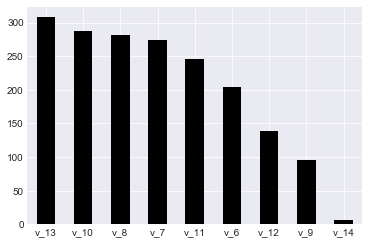

In [13]:
df[[f'v_{x}' for x in range(6,15)]].T.replace(['not quoted','NotShown'], 0
        ).replace('quoted', 1).sum(axis=1).sort_values(ascending=False).plot.bar(rot=0, color='k');

Ergo: Usability > Reliability > Performance Efficiency > Maintainability > Security > Compatibility > Safety > Portability > Other

#### 1.7 What is the number of (non-)distributed projects?

In [14]:
group_and_count(df, 'v_16') # distributed projects, raw

,lfdn
v_16,
Yes,248
No,225
I don't know,15


#### 1.11 Which organisational role does the participant's project team have in their project?

In [15]:
group_and_count(df, 'v_21') # team role, raw

,lfdn
v_21,
In-house development,211
Main contractor (main responsible for the development project),193
Customer,36
Sub-contractor (responsible for part of a larger development project),35
Other (please specify),13


In [16]:
group_and_count(df, 'v_17') # respondent role, raw

,lfdn
v_17,
Project Lead / Project Manager,115
Developer,100
Business Analyst,63
Requirements Engineer,47
Other (please specify),40
Architect,31
Product Manager,29
Product Owner,25
Test Manager / Tester,23


#### 1.12 How do the paticipants characterize the way of working in their projects?

In [17]:
group_and_count(df, 'v_24') # way of working, raw

,lfdn
v_24,
Hybrid,161
Rather agile,118
Rather plan-driven,77
Agile,76
Plan-driven,47
0,9


#### 1.13 How do the participants rate the relationship between their project team and their customer?

In [18]:
group_and_count(df, 'v_25') # relationships, raw

,lfdn
v_25,
Good,239
Very good,116
neutral,100
0,17
Bad,13
Very bad,3


___

#### 2.1 How are the requirements elicited?

In [19]:
df[[f'v_{x}' for x in [28,29,34]]].T.replace(['not quoted','NotShown'], 0
                                             ).replace('quoted', 1).sum(axis=1).sort_values(ascending=False)

v_28    341
v_29    150
v_34     16
dtype: int64

Ergo: Several Iterations > Specifically Dedicated Project Phase > Other

#### 2.2 Which techniques are used for requirements elicitations?

In [20]:
df[[f'v_{x}' for x in [36,37,38,39,40,41,42,43,44,47,45]]].T.replace(['not quoted','NotShown'], 0
                                             ).replace('quoted', 1).sum(axis=1).sort_values(ascending=False)

v_36    339
v_37    292
v_40    277
v_39    235
v_44    171
v_42     97
v_38     96
v_41     85
v_43     84
v_45     25
v_47     18
dtype: int64

Ergo: interviews > analysis of existing documents > workshops and focus groups > prototyping > observations > design thinking > risk analyses > reuse databases and guidelines > external experts > other > we do not elicit requirements

#### 2.3 Who has the primary responsibility for eliciting requirements?

In [21]:
df[['lfdn','v_51']].groupby('v_51').count().sort_values('lfdn', ascending=False)

,lfdn
v_51,
Business Analyst,115
Project Lead / Project Manager,79
Product Owner,67
Requirements Engineer,64
Product Manager,43
Customer,33
Nobody has the primary responsibility,22
Architect,19
Developer,18


#### 2.4 At which level of granularity are the requirements documented and at which point im time?

In [22]:
df[['lfdn','v_59']].groupby('v_59').count().sort_values('lfdn', ascending=False)

,lfdn
v_59,
"We document high-level requirements at beginning of the project and refine them to detailed requirements when needed (for instance, we document epics and refine them to user stories for the sprints).",319
We document detailed requirements at the beginning of the project.,109
We do not document requirements.,33
Other (please specify),27


#### 2.5 How are documented requirements used?

In [23]:
df[[f'v_{x}' for x in range(61,67)]].T.replace(['not quoted','NotShown'], 0
                                             ).replace('quoted', 1).sum(axis=1).sort_values(ascending=False)

v_61    400
v_62    285
v_63    244
v_65    199
v_64    128
v_66     14
dtype: int64

Ergo: basis for implementation > source for tests > used in customer acceptance > reminder for discussions with customer > part of the contract > other

#### 2.6 For which information is an explicit distinction made when documenting requirements?
(Note the vagueness of the question!)

In [24]:
df[[f'v_{x}' for x in range(68,81)]].T.replace(['not quoted', 'NotShown'], 0
                                             ).replace('quoted', 1).sum(axis=1).sort_values(ascending=False)

v_68    272
v_74    231
v_77    214
v_69    191
v_72    180
v_76    169
v_75    166
v_70    158
v_71    121
v_73    112
v_78    106
v_79     55
v_80     15
dtype: int64

Ergo: Functional Properties > Rules > System Behavior > Usage Scenarios > UI > Architectural Constraints > Technical Interfaces > ...

#### 2.7 How are requirements documented?

In [25]:
df[[f'v_{x}' for x in range(82,96)]].T.replace(['not quoted', 'NotShown'], 0
                                             ).replace('quoted', 1).sum(axis=1).sort_values(ascending=False)

v_83    256
v_93    209
v_85    201
v_82    180
v_84    138
v_86    135
v_94    126
v_92    122
v_87    115
v_89     98
v_88     72
v_90     35
v_91     27
v_95     24
dtype: int64

Ergo: natural language > prototypes > user stories > use cases > structured lists of requirements > use case diagrams > sketches > business process models > activity diagrams > sequence diagrams > class diagrams > state machines > goal models > other

#### 2.8 Which classes of non-functional requirements are explicitly considered in requirements documentation?

In [26]:
df[[f'v_{x}' for x in list(range(97,105))+[303]]].T.replace(['not quoted', 'NotShown'], 0
                                             ).replace('quoted', 1).sum(axis=1).sort_values(ascending=False)

v_99     223
v_103    221
v_303    208
v_101    174
v_97     160
v_98     154
v_102     84
v_100     78
v_104     12
dtype: int64

Ergo: Performance Efficiency > Usability > Security > Reliability > Compatibility > Maintainability > Safety > Portability > Other

#### 2.11 How are requirements verified and / or validated?

In [27]:
df[[f'v_{x}' for x in list(range(106,113))]].T.replace(['not quoted', 'NotShown'], 0
                                             ).replace('quoted', 1).sum(axis=1).sort_values(ascending=False)

v_108    231
v_107    197
v_106    194
v_109    136
v_110     78
v_112     44
v_111     31
dtype: int64

Ergo: Informal Peer Reviews > Walkthroughs > Inspections > Simulations > Automatic Checking > Other > No Verification

#### 2.12 How are software testing and requirements aligned?

In [28]:
df[[f'v_{x}' for x in list(range(158,164))]].T.replace(['not quoted', 'NotShown'], 0
                                             ).replace('quoted', 1).sum(axis=1).sort_values(ascending=False)

v_160    271
v_159    223
v_158    214
v_161     82
v_162     58
v_163     16
dtype: int64

Ergo: Define Acceptance Criteria > Check Coverage > Testers Participate in Reviews > Derive Tests from Models > No Alignment > Other

#### 2.13 How do you deal with changing requirements after the initial release of the system (or parts of it)?

In [29]:
group_and_count(df, 'v_165') # change dealings, raw

,lfdn
v_165,
We work with change requests and continuously update our requirements specification accordingly also after formally accepted.,205
We update our product backlog.,135
"We work with change requests, but do not further update our requirements specification once formally accepted.",101
We don't update our requirements (documentation) at all.,29
Other (please specify),18


#### 2.14 How satisfied are the participants on how requirements engineering is done in projects?

In [30]:
group_and_count(df, 'v_167') # RE satisfaction, raw

,lfdn
v_167,
Satisfied,195
Neither dissatisfied nor satisfied,158
Dissatisfied,78
Very satisfied,37
Very dissatisfied,20


#### 3.1 Which problems in RE apply to which extennd?

In [31]:
reprobs = pd.DataFrame(df[[f'v_{x}' for x in list(range(174,194))]
               ].unstack()).rename(columns={0:'answer'}).reset_index().groupby(['level_0', 'answer']).count()
reprobs.head()

level_1
level_0 answer                        
v_174   0                            5
        Does not apply at all       35
        Does rather not apply      144
        Neutral                    111
        Rather applies             144

In [32]:
reprobs[(reprobs.index.get_level_values('level_0') == 'v_176')]

level_1
level_0 answer                        
v_176   0                            9
        Does not apply at all       33
        Does rather not apply      138
        Neutral                    155
        Rather applies             116
        Strongly applies            37

#### 3.2 Hitlist of problems mentioned as Top 1-5 Problem?
   
   Hitlist of problems mentioned as Top 1 - Problem?
   Hitlist of problems mentioned as Top 2 - Problem?
   Hitlist of problems mentioned as Top 3 - Problem?
   Hitlist of problems mentioned as Top 4 - Problem?
   Hitlist of problems mentioned as Top 5 - Problem?

In [33]:
critvars = ['v_' + str(x) for x in range(246, 255, 2)]
reProblems = df[critvars][['v_246']].groupby(df.v_246.values).count().merge(
df[critvars][['v_248']].groupby(df.v_248.values).count(),left_index=True, right_index=True,how='outer').merge(
df[critvars][['v_250']].groupby(df.v_250.values).count(),left_index=True, right_index=True,how='outer').merge(
df[critvars][['v_252']].groupby(df.v_252.values).count(),left_index=True, right_index=True,how='outer').merge(
df[critvars][['v_254']].groupby(df.v_254.values).count(),left_index=True, right_index=True,how='outer')
assert reProblems.shape == (len(set(df[critvars].values.flatten())),5)
# deliberately putting this in the same cell
reProblems['TotalMentions'] = reProblems[list(reProblems.columns.values[0:5])].sum(axis=1).values
reProblems = reProblems.sort_values(['TotalMentions']+list(reProblems.columns.values[0:5]), ascending=False)
reProblems.head()

,v_246,v_248,v_250,v_252,v_254,TotalMentions
Please make a selection,22,37,61,87,102,309
Incomplete or hidden requirements,67,55,39,44,32,237
Communication flaws between the project and the customer,76,44,25,19,28,192
Time boxing / Not enough time in general,59,37,36,36,18,186
Communication flaws within the project team,45,41,26,17,23,152


In [34]:
reProblems.sort_values('v_246', ascending=False).head(20 # replace 246 with 248, 250, 252, 254 to get other rankings
                                                     ).style.apply(highlight_max)

,v_246,v_248,v_250,v_252,v_254,TotalMentions
Communication flaws between the project and the customer,76,44,25,19,28,192
Incomplete or hidden requirements,67,55,39,44,32,237
Time boxing / Not enough time in general,59,37,36,36,18,186
Communication flaws within the project team,45,41,26,17,23,152
"Moving targets (changing goals, business processes and / or requirements)",39,33,25,27,27,151
Underspecified requirements that are too abstract and allow for various interpretations,24,24,29,28,28,133
Stakeholders with difficulties in separating requirements from previously known solution designs,23,28,23,21,21,116
Please make a selection,22,37,61,87,102,309
Inconsistent requirements,20,19,34,35,20,128
Weak access to customer needs and / or (internal) business information,16,18,19,12,16,81


#### 4.1 Which methods for requirements documentation are used to what extend with respect to different ways of working (agile, plan-driven, etc.)?

In [35]:
reqdoc = df[['v_24']+[f'v_{x}' for x in range(82,96)]].replace(['not quoted', 'NotShown'], 0
                        ).replace('quoted', 1).groupby('v_24').sum(
                        ).join(df[['lfdn','v_24']].groupby('v_24').count()
                        ).rename(columns={'lfdn':'ResponseCount'})
reqdoc.T[:-1].style.apply(highlight_max)

v_24,0,Agile,Hybrid,Plan-driven,Rather agile,Rather plan-driven
v_82,1,19,62,18,50,30
v_83,3,38,83,20,67,45
v_84,2,12,46,15,31,32
v_85,1,49,67,4,65,15
v_86,2,17,51,15,23,27
v_87,2,11,47,13,22,20
v_88,1,12,26,7,12,14
v_89,3,13,35,6,29,12
v_90,0,3,11,1,9,11
v_91,0,5,11,2,5,4


In [36]:
reqdocrel = pd.DataFrame(reqdoc, copy=True)
for col in reqdocrel.columns:
    reqdocrel[col] = reqdocrel[col] / reqdocrel['ResponseCount']
reqdocrel.T[:-1].style.apply(highlight_max)

v_24,0,Agile,Hybrid,Plan-driven,Rather agile,Rather plan-driven
v_82,0.111111,0.25,0.385093,0.382979,0.423729,0.38961
v_83,0.333333,0.5,0.515528,0.425532,0.567797,0.584416
v_84,0.222222,0.157895,0.285714,0.319149,0.262712,0.415584
v_85,0.111111,0.644737,0.416149,0.0851064,0.550847,0.194805
v_86,0.222222,0.223684,0.31677,0.319149,0.194915,0.350649
v_87,0.222222,0.144737,0.291925,0.276596,0.186441,0.25974
v_88,0.111111,0.157895,0.161491,0.148936,0.101695,0.181818
v_89,0.333333,0.171053,0.217391,0.12766,0.245763,0.155844
v_90,0,0.0394737,0.068323,0.0212766,0.0762712,0.142857
v_91,0,0.0657895,0.068323,0.0425532,0.0423729,0.0519481


NB: v_83: Natural Language - v_85: User Stories

#### 4.2 What do the hitlists of problems mentioned as Top 5 problems look like with respect to different ways of working (agile, plan-driven, etc.)?

In [37]:
multiindex = pd.DataFrame(df[critvars].unstack()
            ).reset_index().merge(df[['v_24']].reset_index(), how='outer', left_on='level_1', right_on='index'
            ).rename(columns={0:'Problem', 'level_0':'TopVar'}).groupby(['v_24', 'TopVar', 'Problem']
                                                                       ).count()[['index']]
multiindex.index.names = ['Method', 'TopVar', 'Problem']
multiindex = multiindex.sort_index()
multiindex.head()

index
Method TopVar Problem                                                  
0      v_246  Communication flaws between the project and the...      3
              Communication flaws within the project team             1
              Gold plating (implementation of features withou...      1
              Inconsistent requirements                               1
              Insufficient support by project lead                    1

In [38]:
def method_problem(multiindex, method, problem):
    return multiindex[(multiindex.index.get_level_values('Method') == method) 
           & (multiindex.index.get_level_values('TopVar') == problem) 
          ].sort_values('index', ascending=False) 

In [39]:
method_problem(multiindex, 'Plan-driven', 'v_246')

index
Method      TopVar Problem                                                  
Plan-driven v_246  Incomplete or hidden requirements                       8
                   Communication flaws within the project team             5
                   Insufficient support by customer                        4
                   Gold plating (implementation of features withou...      4
                   Communication flaws between the project and the...      3
                   Underspecified requirements that are too abstra...      3
                   Weak relationship between customer and project ...      3
                   Missing traceability                                    2
                   Inconsistent requirements                               2
                   Stakeholders with difficulties in separating re...      2
                   Time boxing / Not enough time in general                2
                   Weak knowledge about customer's application domain      2
                   Please make a selection                                 2
                   Insufficient support by project lead                    1
                   Terminological problems                                 1
                   Unclear / unmeasurable non-functional requirements      1
                   Discrepancy between high degree of innovation a...      1
                   Weak access to customer needs and / or (interna...      1

In [40]:
method_problem(multiindex, 'Agile', 'v_246')

index
Method TopVar Problem                                                  
Agile  v_246  Incomplete or hidden requirements                      12
              Time boxing / Not enough time in general               11
              Communication flaws between the project and the...      7
              Weak access to customer needs and / or (interna...      6
              Underspecified requirements that are too abstra...      5
              Inconsistent requirements                               5
              Moving targets (changing goals, business proces...      5
              Insufficient support by project lead                    4
              Stakeholders with difficulties in separating re...      3
              Unclear / unmeasurable non-functional requirements      3
              Please make a selection                                 3
              Communication flaws within the project team             2
              Terminological problems                                 2
              Insufficient support by customer                        2
              Technically unfeasible requirements                     1
              Missing traceability                                    1
              Gold plating (implementation of features withou...      1
              Volatile customer's business domain regarding, ...      1
              Discrepancy between high degree of innovation a...      1
              Weak knowledge about customer's application domain      1

In [41]:
method_problem(multiindex, 'Hybrid', 'v_246')

index
Method TopVar Problem                                                  
Hybrid v_246  Communication flaws between the project and the...     32
              Incomplete or hidden requirements                      25
              Time boxing / Not enough time in general               18
              Moving targets (changing goals, business proces...     16
              Communication flaws within the project team            13
              Stakeholders with difficulties in separating re...      9
              Please make a selection                                 8
              Underspecified requirements that are too abstra...      5
              Weak access to customer needs and / or (interna...      5
              Insufficient support by customer                        4
              Inconsistent requirements                               4
              Terminological problems                                 4
              Technically unfeasible requirements                     3
              Volatile customer's business domain regarding, ...      3
              Weak knowledge about customer's application domain      3
              Weak relationship between customer and project ...      3
              Discrepancy between high degree of innovation a...      2
              Unclear / unmeasurable non-functional requirements      2
              Missing traceability                                    1
              Gold plating (implementation of features withou...      1

In [42]:
top5 = multiindex.reset_index().groupby(['Method', 'Problem']).sum() # Frame with Top 5 Mentions

In [43]:
top5[(top5.index.get_level_values('Method') == 'Agile')].sort_values('index', ascending=False)

index
Method Problem                                                  
Agile  Please make a selection                                38
       Incomplete or hidden requirements                      38
       Time boxing / Not enough time in general               31
       Communication flaws between the project and the...     30
       Unclear / unmeasurable non-functional requirements     25
       Moving targets (changing goals, business proces...     24
       Weak access to customer needs and / or (interna...     21
       Stakeholders with difficulties in separating re...     20
       Communication flaws within the project team            19
       Terminological problems                                19
       Underspecified requirements that are too abstra...     19
       Weak knowledge about customer's application domain     18
       Inconsistent requirements                              18
       Gold plating (implementation of features withou...     13
       Insufficient support by customer                       12
       Weak relationship between customer and project ...      7
       Insufficient support by project lead                    7
       Technically unfeasible requirements                     6
       Discrepancy between high degree of innovation a...      5
       Volatile customer's business domain regarding, ...      5
       Missing traceability                                    5

In [44]:
top5[(top5.index.get_level_values('Method') == 'Plan-driven')].sort_values('index', ascending=False)

index
Method      Problem                                                  
Plan-driven Incomplete or hidden requirements                      26
            Please make a selection                                25
            Communication flaws within the project team            17
            Underspecified requirements that are too abstra...     16
            Time boxing / Not enough time in general               14
            Stakeholders with difficulties in separating re...     13
            Communication flaws between the project and the...     13
            Inconsistent requirements                              13
            Moving targets (changing goals, business proces...     11
            Unclear / unmeasurable non-functional requirements     11
            Technically unfeasible requirements                    10
            Insufficient support by customer                        9
            Weak knowledge about customer's application domain      9
            Missing traceability                                    8
            Gold plating (implementation of features withou...      8
            Weak access to customer needs and / or (interna...      7
            Insufficient support by project lead                    6
            Terminological problems                                 6
            Discrepancy between high degree of innovation a...      5
            Weak relationship between customer and project ...      5
            Volatile customer's business domain regarding, ...      3

#### 4.3 What do the hitlists of problems mentioned as Top 5 problems look like for (non-)distributed projects?

In [45]:
distps = pd.DataFrame(df[critvars].unstack()
        ).reset_index().merge(df[['v_16']].reset_index(), 
                              how='outer', left_on='level_1', right_on='index'
        ).rename(columns={'v_16':'Distributed', 0:'Problem', 'level_0':'TopVar'}
                ).groupby(['Distributed', 'TopVar', 'Problem']).count()[['index']]

In [46]:
distps[(distps.index.get_level_values('Distributed') == 'Yes') # Replace Yes with different answers
           & (distps.index.get_level_values('TopVar') == 'v_246') # Replace v_246 for other Tops
      ].sort_values('index', ascending=False)

index
Distributed TopVar Problem                                                  
Yes         v_246  Communication flaws between the project and the...     39
                   Incomplete or hidden requirements                      32
                   Time boxing / Not enough time in general               27
                   Moving targets (changing goals, business proces...     23
                   Communication flaws within the project team            22
                   Please make a selection                                15
                   Stakeholders with difficulties in separating re...     14
                   Underspecified requirements that are too abstra...     10
                   Inconsistent requirements                               8
                   Insufficient support by project lead                    7
                   Discrepancy between high degree of innovation a...      7
                   Weak access to customer needs and / or (interna...      7
                   Insufficient support by customer                        6
                   Weak relationship between customer and project ...      6
                   Volatile customer's business domain regarding, ...      5
                   Technically unfeasible requirements                     4
                   Terminological problems                                 4
                   Weak knowledge about customer's application domain      4
                   Missing traceability                                    3
                   Gold plating (implementation of features withou...      3
                   Unclear / unmeasurable non-functional requirements      2

In [47]:
top5_dist = distps.reset_index().groupby(['Distributed', 'Problem']).sum()

In [48]:
top5_dist[top5_dist.index.get_level_values('Distributed') == 'Yes'].sort_values('index', ascending=False)

index
Distributed Problem                                                  
Yes         Please make a selection                               168
            Incomplete or hidden requirements                     116
            Communication flaws between the project and the...     94
            Time boxing / Not enough time in general               92
            Communication flaws within the project team            84
            Moving targets (changing goals, business proces...     75
            Inconsistent requirements                              65
            Stakeholders with difficulties in separating re...     65
            Underspecified requirements that are too abstra...     62
            Unclear / unmeasurable non-functional requirements     49
            Insufficient support by customer                       44
            Terminological problems                                42
            Weak knowledge about customer's application domain     39
            Weak access to customer needs and / or (interna...     36
            Insufficient support by project lead                   35
            Technically unfeasible requirements                    34
            Missing traceability                                   34
            Gold plating (implementation of features withou...     32
            Discrepancy between high degree of innovation a...     27
            Weak relationship between customer and project ...     25
            Volatile customer's business domain regarding, ...     22

In [49]:
top5_dist[top5_dist.index.get_level_values('Distributed') == 'No'].sort_values('index', ascending=False)

index
Distributed Problem                                                  
No          Please make a selection                               122
            Incomplete or hidden requirements                     112
            Communication flaws between the project and the...     92
            Time boxing / Not enough time in general               91
            Moving targets (changing goals, business proces...     74
            Underspecified requirements that are too abstra...     70
            Communication flaws within the project team            64
            Inconsistent requirements                              60
            Unclear / unmeasurable non-functional requirements     50
            Terminological problems                                49
            Stakeholders with difficulties in separating re...     47
            Weak access to customer needs and / or (interna...     42
            Weak knowledge about customer's application domain     40
            Insufficient support by customer                       36
            Gold plating (implementation of features withou...     34
            Missing traceability                                   30
            Insufficient support by project lead                   27
            Technically unfeasible requirements                    26
            Volatile customer's business domain regarding, ...     24
            Discrepancy between high degree of innovation a...     22
            Weak relationship between customer and project ...     13

The End.